In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error

#read in data
raw_data = pd.read_csv("tmdb_5000_movies.csv")

credits = pd.read_csv("tmdb_5000_credits.csv")

#rename column that we merge on to same name
credits = credits.rename(columns={'movie_id' : 'id'})

#drop duplicate column
credits = credits.drop(columns=['title'])

credits.head()

raw_data = pd.merge(raw_data, credits, on='id', how='inner')

#drop unused columns
raw_data = raw_data.drop(columns=['homepage', 'id', 'original_title', 'status', 'vote_average', 'vote_count', 'popularity'])

df = raw_data.dropna()

df.head()

,budget,genres,keywords,original_language,overview,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [2]:
# Vectorize text
vectorizer = TfidfVectorizer()
Label = ['genres', 'keywords', 'original_language', 'overview', 'production_companies', 'production_countries', 'release_date', 
          'spoken_languages', 'tagline', 'cast', 'crew', 'budget','runtime'] 
X = []

for i in range(11):
    x = vectorizer.fit_transform(df[Label[i]].values.astype('U'))
    X.append(x)

for i in range(2):
    X.append(df[[Label[i+11]]])


In [3]:
#split data into sets
Data = []
for x in X:
    Data.append(train_test_split(x, df['revenue'], test_size=0.2, random_state=42))


In [4]:
#Train a linear regression model
Model = []
for data in Data:
    model = LinearRegression()
    model.fit(data[0], data[2])
    Model.append(model)

In [5]:
#Make predictions
Y_pred = []
for i in range(13):
    Y_pred.append(Model[i].predict(Data[i][1]))

In [6]:
#Evaluate the model
for i in range(13):
    mse = mean_squared_error(Data[i][3], Y_pred[i])
    print(f"{Label[i]} Mean Squared Error: {mse}")

genres Mean Squared Error: 2.3210587929718184e+16
keywords Mean Squared Error: 3.5799379140602868e+16
original_language Mean Squared Error: 2.920335337876059e+16
overview Mean Squared Error: 2.9001459604988116e+16
production_companies Mean Squared Error: 3.368169355322493e+16
production_countries Mean Squared Error: 2.8612167587935004e+16
release_date Mean Squared Error: 2.7900587536732916e+16
spoken_languages Mean Squared Error: 3.0112288730895096e+16
tagline Mean Squared Error: 9.181445008887397e+16
cast Mean Squared Error: 1.6315769541098314e+16
crew Mean Squared Error: 1.71017501361883e+16
budget Mean Squared Error: 1.4209729966665974e+16
runtime Mean Squared Error: 2.6975041327403856e+16


Mean Squared Error: 1.346264878317841e+16


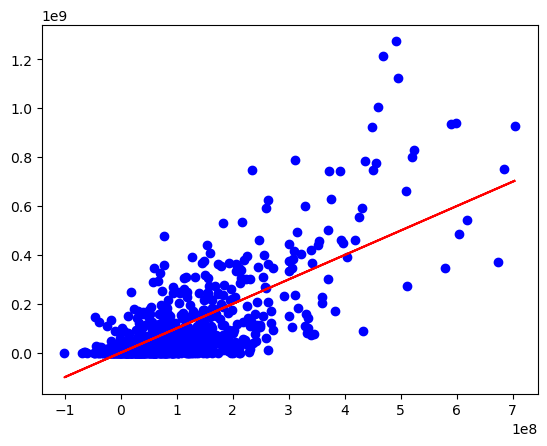

In [7]:
#do model again with best performing features: budget, cast, and crew

cast_vectorized = (vectorizer.fit_transform(df['cast'].values.astype('U'))).toarray()
crew_vectorized = (vectorizer.fit_transform(df['crew'].values.astype('U'))).toarray()
budget_array = np.array(df['budget']).reshape(-1, 1)
x = np.hstack([cast_vectorized, budget_array, crew_vectorized])

X_train, X_test, y_train, y_test = train_test_split(x, df['revenue'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.plot(y_pred, y_test, 'bo')
plt.plot(y_pred, y_pred, 'r-')